In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, Normalizer, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn import set_config
set_config(display='diagram')

from joblib import dump, load

In [2]:
df = pd.read_csv('hour.csv')
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8901,8902,2012-01-11,1,1,1,18,0,3,1,3,0.34,0.3333,0.87,0.1940,2,96,98
11669,11670,2012-05-06,2,1,5,10,0,0,0,2,0.54,0.5152,0.77,0.1045,112,221,333
241,242,2011-01-11,1,0,1,10,0,2,1,2,0.20,0.2121,0.51,0.1642,3,51,54
14788,14789,2012-09-13,3,1,9,9,0,4,1,1,0.60,0.6061,0.64,0.0896,46,292,338
1117,1118,2011-02-19,1,0,2,7,0,6,0,1,0.38,0.3939,0.17,0.5224,6,16,22


In [3]:
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features   = ['temp', 'atemp', 'hum', 'windspeed']
all_features         = categorical_features + numerical_features

In [4]:
transformers = [
    ('one_hot', OneHotEncoder(), categorical_features),
    ('scaler', QuantileTransformer(), numerical_features),
    ('normalizer', Normalizer(), all_features)
]

In [5]:
ct = ColumnTransformer(transformers)

In [6]:
p_steps = [
    ('ct', ct),
    ('model', MLPRegressor())
]

In [7]:
pipeline = Pipeline(p_steps)

In [8]:
pipeline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('scaler',
                                                  QuantileTransformer(),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('normalizer', Normalizer(),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'temp', 'atemp', 'hum',
                                                   'windspeed'])])),
                ('model', MLPRegressor())])

In [9]:
params = {
    'ct__normalizer'            : [ Normalizer(), 'passthrough' ], # nel CT None non funziona per skippare lo step
    'ct__scaler__n_quantiles'   : [ 10, 100 ],
    'model__hidden_layer_sizes' : [ (10, 10), (30, 30), (50, 50) ],
    'model__alpha'              : [ 0.001, 0.01, 0.1 ]
}

In [10]:
grid = GridSearchCV(pipeline, param_grid=params, cv=3)

In [11]:
X = df[all_features]
y = df['cnt']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
grid.fit(X_train, y_train)

/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit']),
                                                                        ('scaler',
                                                                         QuantileTransformer(),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed']),
                                                                        ('normalizer',
                                                                         Normalizer(),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit',
                                                                          'temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'])])),
                                       ('model', MLPRegressor())]),
             param_grid={'ct__normalizer': [Normalizer(), 'passthrough'],
                         'ct__scaler__n_quantiles': [10, 100],
                         'model__alpha': [0.001, 0.01, 0.1],
                         'model__hidden_layer_sizes': [(10, 10), (30, 30),
                                                       (50, 50)]})

In [14]:
grid.best_params_

{'ct__normalizer': 'passthrough',
 'ct__scaler__n_quantiles': 10,
 'model__alpha': 0.001,
 'model__hidden_layer_sizes': (50, 50)}

In [15]:
result_df = pd.DataFrame(grid.cv_results_)

In [16]:
result_df.to_csv('res.csv')

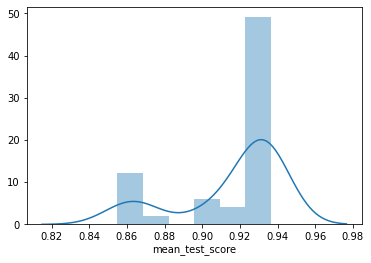

In [17]:
sns.distplot(result_df['mean_test_score'])

[Normalizer() 'passthrough']


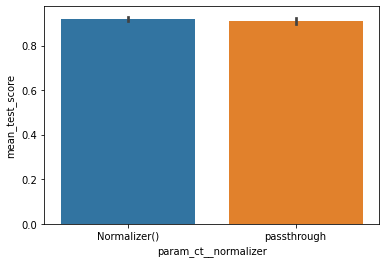

[10 100]


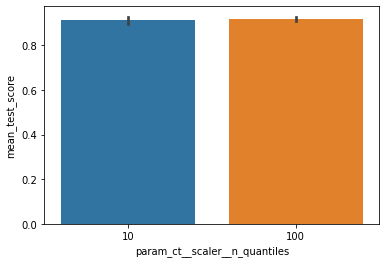

[0.001 0.01 0.1]


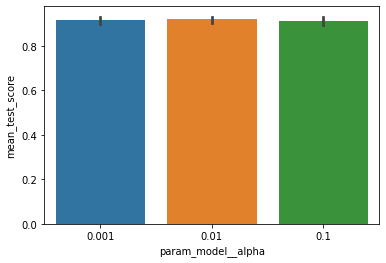

[(10, 10) (30, 30) (50, 50)]


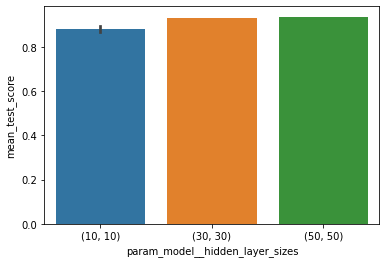

In [18]:
for c in result_df.columns:
    if 'param_' in c:
        print(result_df[c].unique()) # va fatta conversione a stringa
        params_str = result_df[c].astype(str)
        sns.barplot(data=result_df, x=params_str, y='mean_test_score')
        plt.show()

In [19]:
grid.score(X_test, y_test)

0.9444614231705222

In [20]:
grid.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('scaler',
                                                  QuantileTransformer(n_quantiles=10),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('normalizer', 'passthrough',
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'temp', 'atemp', 'hum',
                                                   'windspeed'])])),
                ('model',
                 MLPRegressor(alpha=0.001, hidden_layer_sizes=(50, 50)))])

In [21]:
dump(grid.best_estimator_, 'grid_bike.pkl')

['grid_bike.pkl']

In [22]:
pipe = load('grid_bike.pkl')

In [23]:
p = pipe.predict(df)

/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [24]:
df['predictions'] = p
df['error'] = df['cnt'] - p

In [25]:
df.sample(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predictions,error
14468,14469,2012-08-31,3,1,8,1,0,5,1,1,0.68,0.6364,0.83,0.1642,8,24,32,42.484482,-10.484482
6657,6658,2011-10-09,4,0,10,23,0,0,0,1,0.50,0.4848,0.88,0.1045,38,85,123,82.788588,40.211412
15957,15958,2012-11-02,4,1,11,14,0,5,1,2,0.40,0.4091,0.40,0.4925,63,199,262,256.581320,5.418680
2956,2957,2011-05-08,2,0,5,2,0,0,0,1,0.48,0.4697,0.63,0.0000,17,42,59,52.582122,6.417878
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19,28.727968,-9.727968
14864,14865,2012-09-16,3,1,9,13,0,0,0,1,0.64,0.6212,0.41,0.1642,240,454,694,627.345835,66.654165
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214,199.252479,14.747521
8908,8909,2012-01-12,1,1,1,1,0,4,1,3,0.36,0.3485,0.93,0.1940,0,3,3,13.973283,-10.973283
2289,2290,2011-04-10,2,0,4,6,0,0,0,2,0.36,0.3636,0.93,0.0896,0,4,4,8.646958,-4.646958
12383,12384,2012-06-05,2,1,6,4,0,2,1,3,0.50,0.4848,0.82,0.1940,1,4,5,4.414973,0.585027


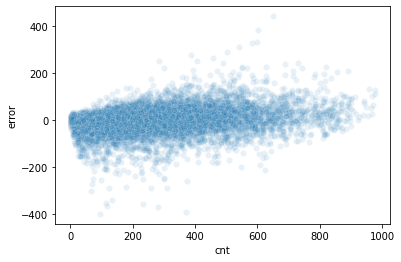

In [31]:
sns.scatterplot(data=df, x='cnt', y='error', alpha=0.1)

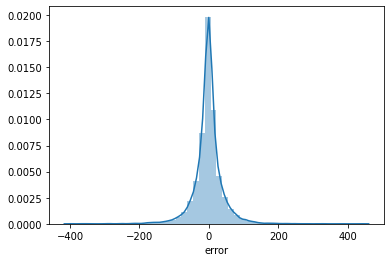

In [35]:
sns.distplot(df['error'])